In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

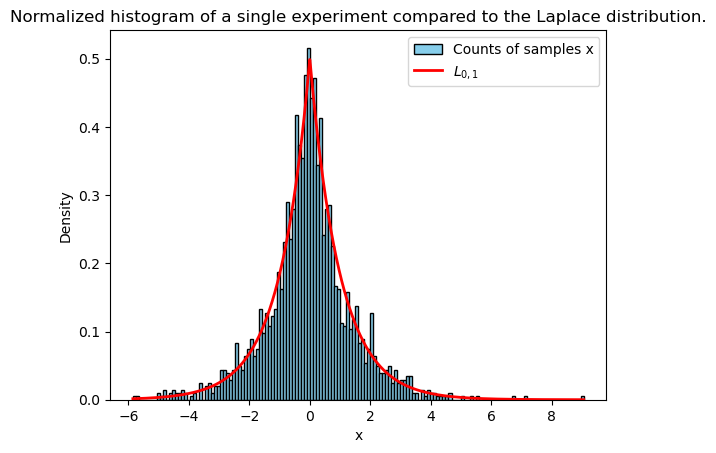

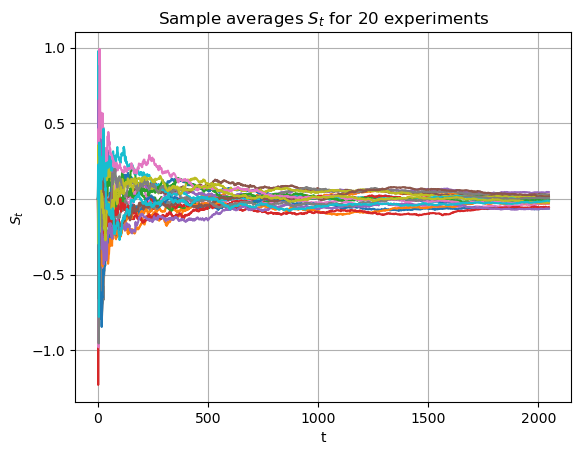

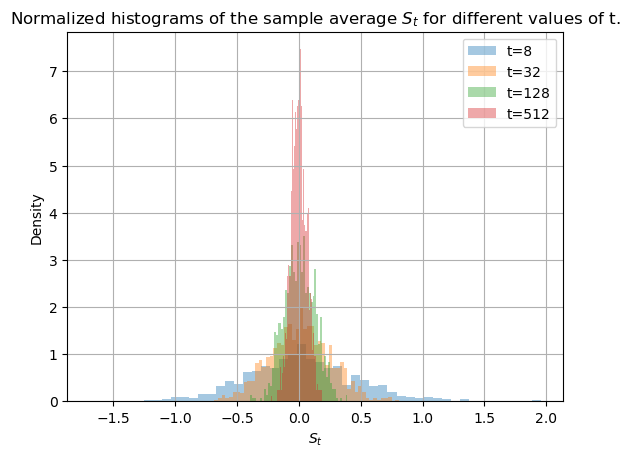

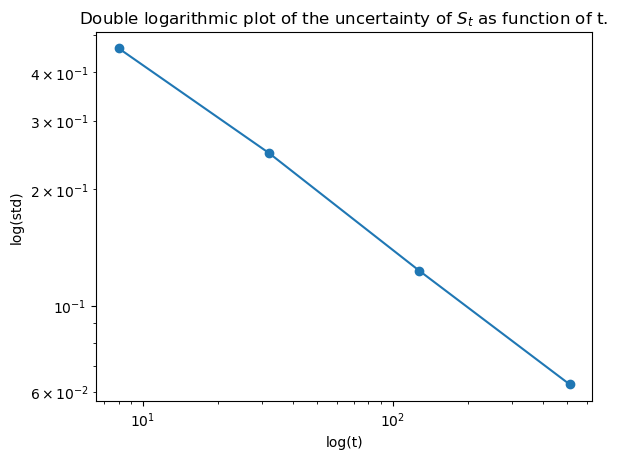

In [9]:

def S(t,x):
    return sum(x)/t

mu = 0.0
b = 1.0
T=2**11
X = 1000
size=(X,T)

x_samples = np.random.laplace(loc=mu, scale=b, size=size)

t_values = np.linspace(1, T, 2**11)
x_values = np.linspace(min(x_samples[0,:]), max(x_samples[0,:]), 2**11)
L_values = laplace.pdf(x_values, loc=mu, scale=b)


plt.hist(x_samples[0,:], bins=150, density=True, color='skyblue', edgecolor='black', label='Counts of samples x')
plt.plot(x_values, L_values, color='red', linewidth=2, label=r'$L_{0,1}$')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Normalized histogram of a single experiment compared to the Laplace distribution.')
plt.legend()
plt.show()

    
for j in range(20):
    S_values=[]

    for i in range(1, T+1):
            S_values.append(S(i,x_samples[j,0:i-1]))

    plt.plot(t_values, S_values, label=f'{j+1}')
    
plt.xlabel('t')
plt.ylabel(r'$S_{t}$')
plt.title(r'Sample averages $S_{t}$ for 20 experiments')
plt.grid()
plt.show()

t = [8, 32, 128, 512]

uncertainty_S = []

for j in t:
    S_val = []
    for i in range(X):
        S_val.append(S(j, x_samples[i,0:(j-1)]))

    plt.hist(S_val, density=True, alpha=0.4, bins=50, label=f't={j}')
    uncertainty_S.append(np.std(S_val))
    
    
plt.xlabel(r'$S_{t}$') 
plt.ylabel('Density')
plt.title(r'Normalized histograms of the sample average $S_{t}$ for different values of t.')
plt.legend()
plt.grid()
plt.show()



plt.loglog(t, uncertainty_S, marker='o')
plt.xlabel('log(t)')
plt.ylabel('log(std)')
plt.title(r'Double logarithmic plot of the uncertainty of $S_{t}$ as function of t.')
plt.show()

* The distribution of the samples randomly drawn under the laplace distribution match the underlying Laplace distribution $L_{0,1}$
* As one can see over the course of the experiment (as n gets bigger) the sample average converges to the median of the underlying distribution. As expected you get a better estimate of your obervable for larger n, but at some point the improvement gets so small in comparison to the increase of n, that there might be a point to stop the experiment.
* In all of the three last plots one can see that for a later time in the experiment (for greater n) the uncertainty of the obervable will decrease and the precision therefore will increase. As explained on the exercise sheet and in the lecture the CLT states, that for bigger experiments the distribution of a sample average converges to a standard normal distribution with variance $\frac{\sigma^2}{n}$. So the decrease of the uncertainty for bigger n seen in these experiments are in sync with the CLT.

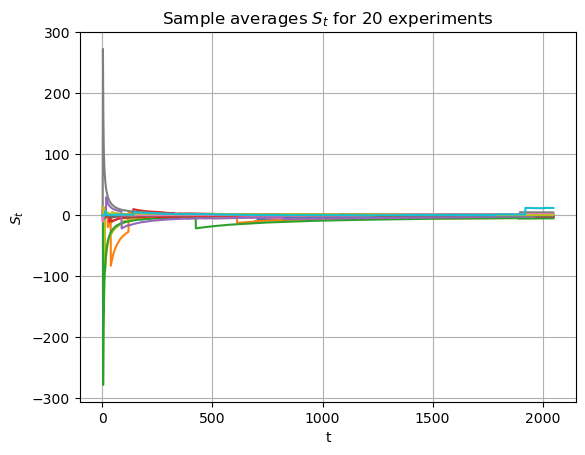

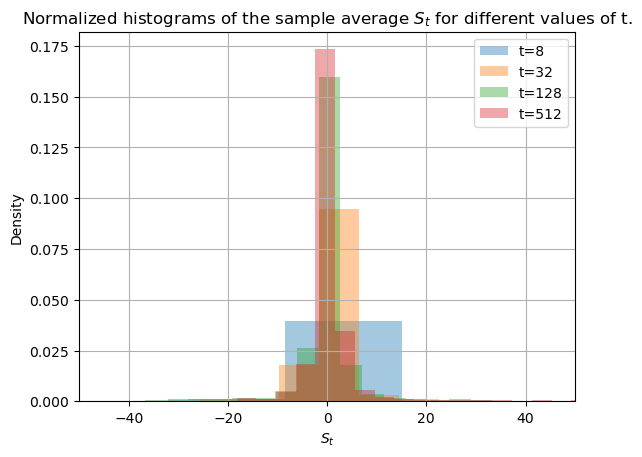

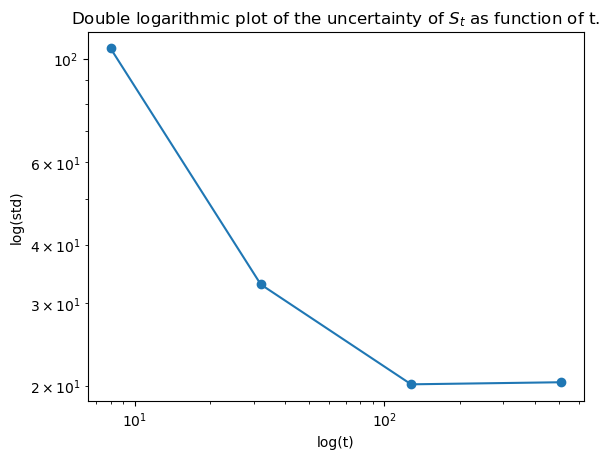

In [21]:
def S(t,x):
    return sum(x)/t

T=2**11
X = 1000
size=(X,T)

x_samples =np.random.standard_cauchy(size=size) 

t_values = np.linspace(1, T, 2**11)
x_values = np.linspace(min(x_samples[0,:]), max(x_samples[0,:]), 2**11)

for j in range(20):
    S_values=[]

    for i in range(1, T+1):
            S_values.append(S(i,x_samples[j,0:i-1]))

    plt.plot(t_values, S_values, label=f'{j+1}')
    
plt.xlabel('t')
plt.ylabel(r'$S_{t}$')
plt.title(r'Sample averages $S_{t}$ for 20 experiments')
plt.grid()
plt.show()


t = [8, 32, 128, 512]

uncertainty_S = []

for j in t:
    S_val = []
    for i in range(X):
        S_val.append(S(j, x_samples[i,0:(j-1)]))

    plt.hist(S_val, density=True, alpha=0.4, bins=150, label=f't={j}')
    uncertainty_S.append(np.std(S_val))
    
plt.xlim([-50, 50])    
plt.xlabel(r'$S_{t}$') 
plt.ylabel('Density')
plt.title(r'Normalized histograms of the sample average $S_{t}$ for different values of t.')
plt.legend()
plt.grid()
plt.show()


plt.loglog(t, uncertainty_S, marker='o')
plt.xlabel('log(t)')
plt.ylabel('log(std)')
plt.title(r'Double logarithmic plot of the uncertainty of $S_{t}$ as function of t.')
plt.show()